In [2]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [42]:
pd.DataFrame(X).tail()

,0,1,2,3
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)
yhat = clf_norm.predict(X)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [23]:
clf_norm.classes_

array([0, 1, 2])

In [24]:
clf_norm.class_count_

array([ 50.,  50.,  50.])

In [25]:
clf_norm.class_prior_

array([ 0.33333333,  0.33333333,  0.33333333])

In [26]:
clf_norm.theta_, clf_norm.sigma_

(array([[ 5.006,  3.418,  1.464,  0.244],
        [ 5.936,  2.77 ,  4.26 ,  1.326],
        [ 6.588,  2.974,  5.552,  2.026]]),
 array([[ 0.121764,  0.142276,  0.029504,  0.011264],
        [ 0.261104,  0.0965  ,  0.2164  ,  0.038324],
        [ 0.396256,  0.101924,  0.298496,  0.073924]]))

In [10]:
confusion_matrix(y, yhat)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [11]:
print(classification_report(y, yhat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



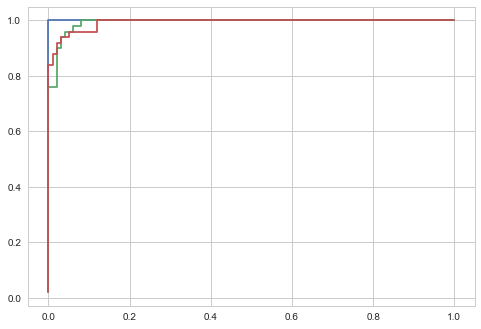

In [40]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_multi = label_binarize(y, classes=[0, 1, 2])
d1_multi = clf_norm.predict_log_proba(X)

fpr10, tpr10, thresholds10 = roc_curve(y_multi[:, 0], d1_multi[:, 0])
fpr11, tpr11, thresholds11 = roc_curve(y_multi[:, 1], d1_multi[:, 1])
fpr12, tpr12, thresholds12 = roc_curve(y_multi[:, 2], d1_multi[:, 2])

plt.plot(fpr10, tpr10, label="class 0")
plt.plot(fpr11, tpr11, label="class 1")
plt.plot(fpr12, tpr12, label="class 2")

plt.show()

In [12]:
from sklearn.metrics import auc

In [41]:
auc(fpr10, tpr10), auc(fpr11, tpr11), auc(fpr12, tpr12)

(1.0, 0.99239999999999995, 0.99240000000000006)